<a href="https://colab.research.google.com/github/mAminl/HWs/blob/master/HW2Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Full Name: MohammadAmin Latifi

Student Number: 401300966

HW 2, Question 2:

Part a):

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

Data = pd.read_csv('/international_matches.csv', sep=',')
Data.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


Part b):

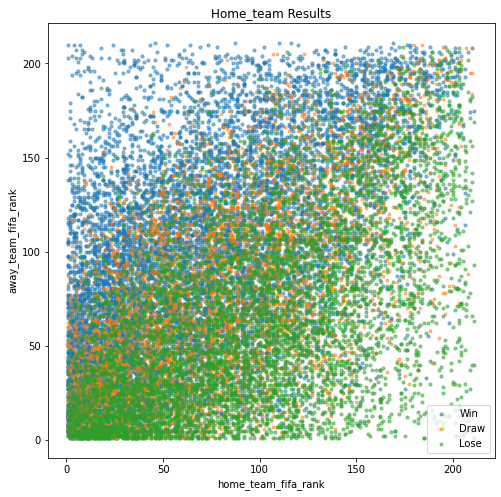

In [2]:
plt.figure(figsize=(8,8))
plt.xlabel('home_team_fifa_rank')
plt.ylabel('away_team_fifa_rank')

df = Data[Data['home_team_result'] == 'Win']
plt.scatter(df['home_team_fifa_rank'], df['away_team_fifa_rank'],s = 10,alpha = 0.5)
df = Data[Data['home_team_result'] == 'Draw']
plt.scatter(df['home_team_fifa_rank'], df['away_team_fifa_rank'],s = 8,alpha = 0.5)
df = Data[Data['home_team_result'] == 'Lose']
plt.scatter(df['home_team_fifa_rank'], df['away_team_fifa_rank'],s = 10,alpha = 0.5)
plt.legend(['Win','Draw','Lose'])
plt.title('Home_team Results')

plt.show()

Part c):

In [3]:
df = Data.loc[Data['away_team_total_fifa_points']==0]
Data = Data.drop(df.index)
df = Data.loc[Data['home_team_total_fifa_points']==0]
Data = Data.drop(df.index)
Data = Data.reset_index()

Data['home_team_result'] = Data['home_team_result'].replace(['Win'],2)
Data['home_team_result'] = Data['home_team_result'].replace(['Draw'],1)
Data['home_team_result'] = Data['home_team_result'].replace(['Lose'],0)

Train = Data.sample(frac=0.75,random_state=123).copy()
Test = Data.drop(Train.index).copy()
Train.reset_index()
Test.reset_index()

print(f'Data shape is: {Data.shape}')
print(f'Validation data shape is: {Test.shape}')
print(f'Training data shape is: {Train.shape}')

Data shape is: (9594, 26)
Validation data shape is: (2398, 26)
Training data shape is: (7196, 26)


Part d):

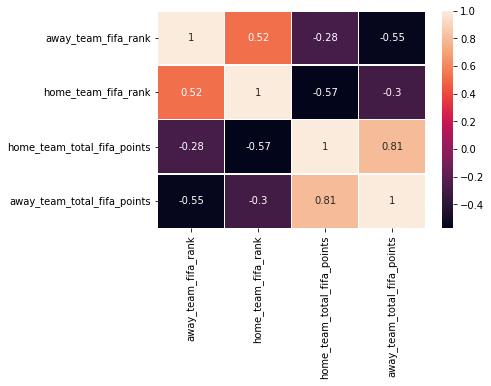

In [4]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df = Data[['away_team_fifa_rank','home_team_fifa_rank','home_team_total_fifa_points','away_team_total_fifa_points']]
x_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(x_scaled,index=df.index,columns = df.columns)
sns.heatmap(df_normalized.corr(), annot=True, linewidth=.5)

Part e):

In [5]:
from torch.nn.functional import softmax
from torch.utils.data import DataLoader

df = Train[['away_team_fifa_rank','home_team_fifa_rank','home_team_total_fifa_points','away_team_total_fifa_points']]
x_scaled = min_max_scaler.fit_transform(df)
train_df_normalized = pd.DataFrame(x_scaled,index=df.index,columns = df.columns)

# train_features = torch.tensor( data = train_df_normalized.values, requires_grad = False )
train_features = torch.tensor( data = df.values, requires_grad = False )
train_targets = torch.tensor( data = Train['home_team_result'].values, requires_grad = False )
train_targets = torch.nn.functional.one_hot(train_targets)
training_data = torch.cat((train_features,train_targets),1)
train_dataloader = DataLoader(training_data, batch_size=8, shuffle=True)

df = Test[['away_team_fifa_rank','home_team_fifa_rank','home_team_total_fifa_points','away_team_total_fifa_points']]
x_scaled = min_max_scaler.fit_transform(df)
test_df_normalized = pd.DataFrame(x_scaled,index=df.index,columns = df.columns)

# test_features = torch.tensor( data = test_df_normalized.values, requires_grad = False )
test_features = torch.tensor( data = df.values, requires_grad = False )
test_targets = torch.tensor( data = Test['home_team_result'].values, requires_grad = False )
test_targets = torch.nn.functional.one_hot(test_targets)

testing_data = torch.cat((test_features,test_targets),1)
test_dataloader = DataLoader(testing_data, batch_size=8, shuffle=True)

from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.BatchNorm1d(20),
            nn.ReLU(),
            nn.Linear(20, 8),
            nn.Linear(8, 3)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device).float()
print(model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, X in enumerate(dataloader):
        X = X.to(device).float()
        x = X[:,:-3]
        y = X[:,-3:]
        # Compute prediction error
        pred = model(x)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X in dataloader:
            X = X.to(device).float()
            x = X[:,:-3]
            y = X[:,-3:]
            pred = model(x)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): Linear(in_features=20, out_features=8, bias=True)
    (6): Linear(in_features=8, out_features=3, bias=True)
  )
)


Part f):

In [6]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.162256  [    0/ 7196]
loss: 1.253985  [  800/ 7196]
loss: 0.987426  [ 1600/ 7196]
loss: 1.213919  [ 2400/ 7196]
loss: 0.928400  [ 3200/ 7196]
loss: 1.060936  [ 4000/ 7196]
loss: 0.665740  [ 4800/ 7196]
loss: 1.173493  [ 5600/ 7196]
loss: 0.995004  [ 6400/ 7196]
Test Error: 
 Accuracy: 54.8%, Avg loss: 0.998487 

Epoch 2
-------------------------------
loss: 1.012309  [    0/ 7196]
loss: 0.753918  [  800/ 7196]
loss: 1.403172  [ 1600/ 7196]
loss: 1.040964  [ 2400/ 7196]
loss: 1.151674  [ 3200/ 7196]
loss: 1.245046  [ 4000/ 7196]
loss: 0.919540  [ 4800/ 7196]
loss: 0.929357  [ 5600/ 7196]
loss: 1.048315  [ 6400/ 7196]
Test Error: 
 Accuracy: 56.0%, Avg loss: 0.955886 

Epoch 3
-------------------------------
loss: 0.905651  [    0/ 7196]
loss: 1.269327  [  800/ 7196]
loss: 1.288290  [ 1600/ 7196]
loss: 0.679521  [ 2400/ 7196]
loss: 0.922254  [ 3200/ 7196]
loss: 1.173677  [ 4000/ 7196]
loss: 0.942023  [ 4800/ 7196]
loss: 1.162772  [ 5600/ 71

Part g):

Updates on 1/12/2022:

**Teams: Points, Ranking**

**England:**1728.47,5

**USA:**1627.48,16

**Wales:**1569.82,19

**Iran:** 1564.61,20

**Iran's Match:**(Home/Away)

ENG/IRN

Wales/IRN

IRN/USA

    

In [7]:
d = {'away_team_fifa_rank':[20,20,19],'home_team_fifa_rank':[5,19,20],
     'home_team_total_fifa_points':[1728.47,1569.82,1564.61],
     'away_team_total_fifa_points':[1564.61,1564.61,1627.48]}
WorldCup_2022 = pd.DataFrame(data = d)
WorldCup_2022

,away_team_fifa_rank,home_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points
0,20,5,1728.47,1564.61
1,20,19,1569.82,1564.61
2,19,20,1564.61,1627.48


In [8]:
features = torch.tensor( data = WorldCup_2022.values, requires_grad = False )
pred = model(features.to(device).float())
print(f'Home team results predictions is:[L,D,W]\n{nn.Softmax(dim=1)(pred)}')


Home team results predictions is:[L,D,W]
tensor([[0.1584, 0.2431, 0.5984],
        [0.3912, 0.2833, 0.3256],
        [0.4442, 0.2764, 0.2794]], grad_fn=<SoftmaxBackward0>)
